In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder 



In [250]:
data = pd.read_csv("C:\\Users\\Kasutaja\\Downloads\\loan.csv")
data.head(2)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False


In [251]:
#---Data Wrangling-------

In [252]:
data.isnull().any()

customer_id          False
loan_id              False
loan_type            False
loan_amount          False
interest_rate        False
loan_term            False
employment_type      False
income_level         False
credit_score         False
gender               False
marital_status       False
education_level      False
application_date     False
approval_date        False
disbursement_date    False
due_date             False
default_status       False
dtype: bool

In [253]:
data.duplicated().sum()*100/len(data)

0.0

In [254]:
data.marital_status.isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: marital_status, Length: 5000, dtype: bool

In [255]:
data.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [256]:
#-----------------Data Exploratory-------------------------------------------


In [257]:
#---------Statistic Analysis-------

In [258]:
data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [259]:
#------Finding Relation Ship---------

In [260]:
pd.crosstab(data['credit_score'],data['default_status'],margins = True)

default_status,False,True,All
credit_score,,,
300,10,2,12
301,5,4,9
302,6,1,7
303,5,3,8
304,7,3,10
...,...,...,...
846,6,1,7
847,6,1,7
848,12,2,14


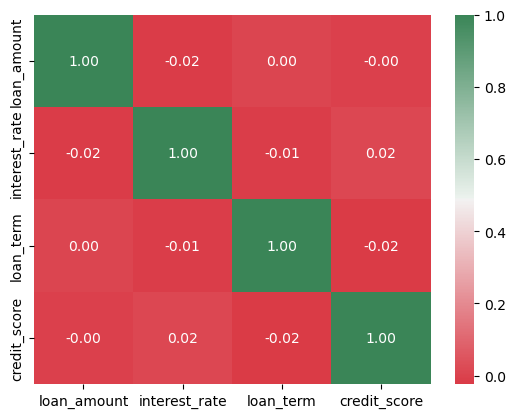

In [261]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # since our data has non numeric data as well

corr = numeric_data.corr() # Finding the correlation between different columns

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(10, 500, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colorsintheheatmap, annot=True, fmt=".2f")
plt.show()

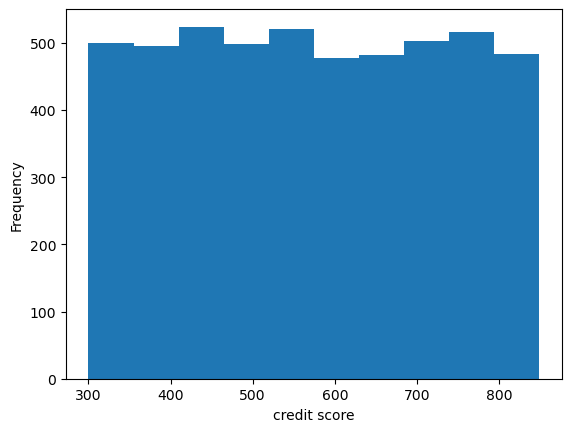

In [262]:
credit_score = data['credit_score']
plt.hist(credit_score, bins=10)
plt.xlabel("credit score")
plt.ylabel("Frequency")
plt.show()

In [263]:
data.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [264]:
#-------------------------CLASSIFICATION USING LOGISTIC REGRESSION------------------------

In [266]:
#prepare the data for prediction
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column FOR PREDICTION 
data['default_status']= label_encoder.fit_transform(data['default_status']) 
data['employment_type']= label_encoder.fit_transform(data['employment_type']) 
data['income_level']= label_encoder.fit_transform(data['income_level']) 
data['marital_status']= label_encoder.fit_transform(data['marital_status']) 
data['education_level']= label_encoder.fit_transform(data['education_level']) 


In [267]:
data['default_status'].unique() 

array([0, 1], dtype=int64)

In [268]:
X_logistic = data[[ 'credit_score', 'employment_type',
       'income_level','education_level','marital_status']]


In [269]:
y_logistic = data['default_status']
y_logistic

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: default_status, Length: 5000, dtype: int64

In [270]:
X_logistic

,credit_score,employment_type,income_level,education_level,marital_status
0,833,2,2,2,2
1,776,0,2,0,1
2,697,0,1,1,0
3,795,0,1,3,1
4,519,1,1,1,1
...,...,...,...,...,...
4995,511,2,0,3,1
4996,502,1,2,3,2
4997,452,0,0,1,2
4998,728,2,2,3,1


In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2)

In [279]:
#creating model
model = LogisticRegression()

In [280]:

#fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [281]:
y_pred = model.predict(X_test)

In [282]:
#y_pred

In [283]:
#----------Evaluation process-----------

In [284]:
logistic_accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)

print(f"Accuracy ((TP+TN)/Total): {round(logistic_accuracy,2)}")
print(f"Precision (TP/Predicted 1): {round(precision, 2)}")
print(f"Recall (TP/Actual 1): {round(recall,2)}")

Accuracy ((TP+TN)/Total): 0.79
Precision (TP/Predicted 1): 0.0
Recall (TP/Actual 1): 0.0


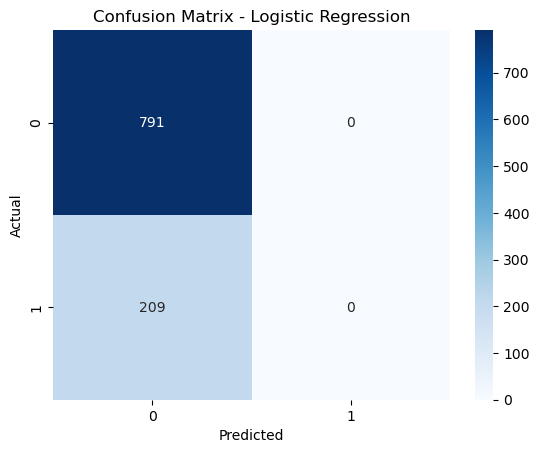

In [285]:
# ---------Confusion Matrix Visualization----------------

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()